In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('2019.csv')
#drop unneccessary columns
df.drop(['Rk', '2PM', '2PP', 'DKPt', 'FDPt', 'VBD', 'PosRank', 'OvRank', 'PPR', 'Fmb', 'GS'], axis=1, inplace=True)

#fix name formatting
df['Player'] = df['Player'].apply(lambda x: x.split('*')[0]).apply(lambda x: x.split('\\')[0])

#rename columns
df.rename({
    'TD': 'PassingTD',
    'TD.1': 'RushingTD',
    'TD.2': 'ReceivingTD',
    'TD.3': 'TotalTD',
    'Yds': 'PassingYDs',
    'Yds.1': 'RushingYDs',
    'Yds.2': 'ReceivingYDs',
    'Att': 'PassingAtt',
    'Att.1': 'RushingAtt'
}, axis=1, inplace=True)

#seperate dataframes based off position
rb_df = df[df['FantPos'] == 'RB']
qb_df = df[df['FantPos'] == 'QB']
wr_df = df[df['FantPos'] == 'WR']
te_df = df[df['FantPos'] == 'TE']

rb_df.head()

,Player,Tm,FantPos,Age,G,Cmp,PassingAtt,PassingYDs,PassingTD,Int,...,Y/A,RushingTD,Tgt,Rec,ReceivingYDs,Y/R,ReceivingTD,FL,TotalTD,FantPt
0,Christian McCaffrey,CAR,RB,23,16,0,2,0,0,0,...,4.83,15,142,116,1005,8.66,4,0,19,355.0
2,Derrick Henry,TEN,RB,25,15,0,0,0,0,0,...,5.08,16,24,18,206,11.44,2,3,18,277.0
3,Aaron Jones,GNB,RB,25,16,0,0,0,0,0,...,4.59,16,68,49,474,9.67,3,2,19,266.0
4,Ezekiel Elliott,DAL,RB,24,16,0,0,0,0,0,...,4.51,12,71,54,420,7.78,2,2,14,258.0
5,Dalvin Cook,MIN,RB,24,14,0,0,0,0,0,...,4.54,13,63,53,519,9.79,0,2,13,239.0


In [3]:
rushing_columns = ['RushingAtt', 'RushingYDs', 'Y/A', 'RushingTD']
receiving_columns = ['Tgt', 'Rec', 'ReceivingYDs', 'Y/R', 'ReceivingTD']
passing_columns = ['PassingTD', 'PassingYDs', 'Cmp', 'PassingAtt', 'Int']

def transform_columns(df, new_column_list):
    df = df[['Player','Tm', 'Age', 'G','FantPt'] + new_column_list + ['FL']]
    return df

rb_df = transform_columns(rb_df, rushing_columns+receiving_columns)

rb_df['FantasyPoints'] = (rb_df['RushingYDs']*0.1 + rb_df['RushingTD']*6+ rb_df['ReceivingYDs']*0.1 + rb_df ['ReceivingTD']*6 - rb_df['FL']*2)
rb_df['Total Usage'] = (rb_df['RushingAtt'] + rb_df['Tgt'])
rb_df = rb_df[rb_df['RushingAtt'] > 20]

In [4]:
x = rb_df['Total Usage'].values.reshape(-1, 1)
y = rb_df['FantasyPoints'].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(x_train, y_train) #training the algorithm
y_pred = regressor.predict(x_test)

In [5]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,265.8,199.907703
1,111.1,95.167927
2,143.2,171.037124
3,165.3,173.051350
4,171.6,176.408394
5,138.6,166.337262
6,51.6,59.583260
7,35.4,32.055499
8,25.3,19.970140
9,41.5,44.812266


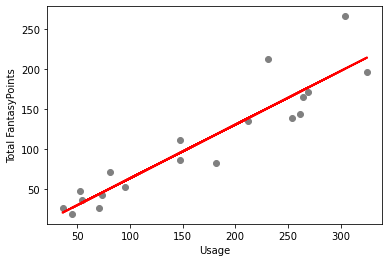

In [6]:

plt.scatter(x_test, y_test,  color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.xlabel('Usage')
plt.ylabel('Total FantasyPoints')
plt.show()

In [7]:
print('Variance score: %.2f' % regressor.score(x_test, y_test))

Variance score: 0.86


In [8]:
wr_df = transform_columns(wr_df, rushing_columns+receiving_columns)

wr_df['FantasyPoints'] = (wr_df['RushingYDs']*0.1 + wr_df['RushingTD']*6+ wr_df['ReceivingYDs']*0.1 + wr_df ['ReceivingTD']*6 - wr_df['FL']*2)
wr_df['Total Usage'] = (wr_df['RushingAtt'] + wr_df['Tgt'])
wr_df = wr_df[wr_df['ReceivingYDs'] > 100]

In [9]:
x = wr_df['Total Usage'].values.reshape(-1, 1)
y = wr_df['FantasyPoints'].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(x_train, y_train) #training the algorithm
y_pred = regressor.predict(x_test)

In [10]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,132.9,167.666463
1,163.7,129.887414
2,108.3,106.553296
3,27.6,29.884051
4,130.3,106.553296
5,131.9,102.108702
6,101.1,69.885396
7,82.8,97.664108
8,21.8,33.217496
9,64.1,50.995872


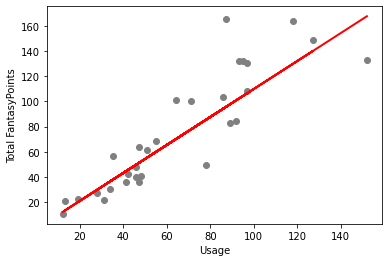

In [11]:

plt.scatter(x_test, y_test,  color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.xlabel('Usage')
plt.ylabel('Total FantasyPoints')
plt.show()

In [12]:
print('Variance score: %.2f' % regressor.score(x_test, y_test))

Variance score: 0.77


In [13]:
qb_df = transform_columns(qb_df, rushing_columns+passing_columns)

qb_df['FantasyPoints'] = (qb_df['RushingYDs']*0.1 + qb_df['RushingTD']*6+ qb_df['PassingYDs']*0.04 + qb_df ['PassingTD']*4 - qb_df['FL']*2 - qb_df['Int']*2)
qb_df['Total Usage'] = (qb_df['RushingAtt'] + qb_df['PassingAtt'])
qb_df = qb_df[qb_df['PassingAtt'] > 100]

In [14]:
x = qb_df['Total Usage'].values.reshape(-1, 1)
y = qb_df['FantasyPoints'].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(x_train, y_train) #training the algorithm
y_pred = regressor.predict(x_test)

In [15]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,103.48,107.368310
1,56.50,42.819707
2,177.48,239.968151
3,297.36,322.029940
4,265.34,304.516754
5,200.82,261.484352
6,166.56,134.889032
7,261.68,299.012609
8,46.46,70.340429


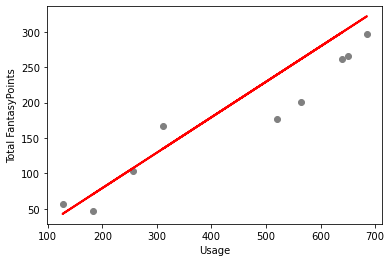

In [16]:
plt.scatter(x_test, y_test,  color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.xlabel('Usage')
plt.ylabel('Total FantasyPoints')
plt.show()

In [17]:
print('Variance score: %.2f' % regressor.score(x_test, y_test))

Variance score: 0.81
